This code is used to compute error curves as in Figure 1 of the paper.
Recovery in the Wigner model
---

experiment with 3 different networks  with same hidden and output layer dimensions and different latent space dimension.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import importlib

In [2]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [4]:
import sys
PATH = '/content/gdrive/My Drive/Colab Notebooks/NEURIPS20'
sys.path.append(PATH)

In [5]:
import generative as gnl
import utils
import spike_lib as spike

In [6]:
importlib.reload(spike);

In [18]:
PATH_res = PATH + '/RESULTS/WG'
print(PATH_res)

/content/gdrive/My Drive/Colab Notebooks/NEURIPS20/RESULTS/WG


# COMPUTATIONS

In [19]:
# control parameter
p = np.linspace(0.01, 1.95, 8)
# number of Monte Carlo runs
NMC = 75
print(p)

hid_dim = 250 # hidden layer width
space_dim  = 1700 # ouptut dim
layers = [10, hid_dim, space_dim] 
th = np.log((layers[1]**2)*layers[2]) 

[0.01       0.28714286 0.56428571 0.84142857 1.11857143 1.39571429
 1.67285714 1.95      ]


In [25]:
PATH_res = PATH + '/RESULTS/WG'
print(PATH_res)

/content/gdrive/My Drive/Colab Notebooks/NEURIPS20/RESULTS/WG


In [26]:
#optimization params
Nsteps = 2000
LR  = 0.01
sigma0 = 0.0001 # we randomly initialize the iterates from x_0 \mathcal{N}(0, \sigma0^2 I)
params = [LR, Nsteps, sigma0]

### $k = 10$

In [27]:
# architecture
latent_dim = 10
layers = [latent_dim, hid_dim, space_dim]

# target latent vector
xstar = Variable(torch.zeros(latent_dim)) # the target point is zstar = e_2 
xstar.data[1] = 1
xstar = xstar.cuda()

In [28]:
k10_logs_mean = np.zeros([len(p),6])
k10_logs_std = np.zeros([len(p),6])

# in the Wigner model we vary the noise level nu of the GOE matrix H
NU10 = np.sqrt(space_dim/(latent_dim*th))*p
print('NU used \n', NU10)

NU used 
 [0.030329   0.87087567 1.71142233 2.551969   3.39251566 4.23306233
 5.07360899 5.91415566]


In [29]:
%%time
for ix, nu in enumerate(NU10):
    print(ix)
    [LOGS_mean, LOGS_std] = spike.MC_expr_Wigner(NMC, xstar, layers, nu, params, normalize = True)
    k10_logs_mean[ix,:] = LOGS_mean
    k10_logs_std[ix,:] = LOGS_std
    np.save(PATH_res+'/k10_logs_mean.npy', k10_logs_mean)
    np.save(PATH_res+'/k10_logs_std.npy', k10_logs_std)

0
1
2
3
4
5
6
7
CPU times: user 32min 39s, sys: 1min 17s, total: 33min 56s
Wall time: 34min 18s


### $k = 30$

In [30]:
# architecture
latent_dim = 30
layers = [latent_dim, hid_dim, space_dim]

# target latent vector
xstar = Variable(torch.zeros(latent_dim)) # the target point is zstar = e_2 
xstar.data[1] = 1
xstar = xstar.cuda()

In [31]:
k30_logs_mean = np.zeros([len(p),6])
k30_logs_std = np.zeros([len(p),6])

NU30 = np.sqrt(space_dim/(latent_dim*th))*p
print('NU used \n', NU30)

NU used 
 [0.01751046 0.5028003  0.98809014 1.47337999 1.95866983 2.44395967
 2.92924952 3.41453936]


In [32]:
%%time
for ix, nu in enumerate(NU30):
    print(ix)
    [LOGS_mean, LOGS_std] = spike.MC_expr_Wigner(NMC, xstar, layers, nu, params, normalize = True)
    k30_logs_mean[ix,:] = LOGS_mean
    k30_logs_std[ix,:] = LOGS_std
    np.save(PATH_res+'/k30_logs_mean.npy', k30_logs_mean)
    np.save(PATH_res+'/k30_logs_std.npy', k30_logs_std)

0
1
2
3
4
5
6
7
CPU times: user 32min 25s, sys: 1min 17s, total: 33min 42s
Wall time: 34min 3s


### $k = 70$

In [33]:
# architecture
latent_dim = 70
layers = [latent_dim, hid_dim, space_dim]

# target latent vector
xstar = Variable(torch.zeros(latent_dim)) # the target point is zstar = e_2 
xstar.data[1] = 1
xstar = xstar.cuda()

In [34]:
k70_logs_mean = np.zeros([len(p),6])
k70_logs_std = np.zeros([len(p),6])

NU70 = np.sqrt(space_dim/(latent_dim*th))*p
print('NU used \n', NU70)

NU used 
 [0.01146329 0.32916006 0.64685684 0.96455362 1.28225039 1.59994717
 1.91764395 2.23534073]


In [35]:
%%time
for ix, nu in enumerate(NU70):
    print(ix)
    [LOGS_mean, LOGS_std] = spike.MC_expr_Wigner(NMC, xstar, layers, nu, params, normalize = True)
    k70_logs_mean[ix,:] = LOGS_mean
    k70_logs_std[ix,:] = LOGS_std
    np.save(PATH_res+'/k70_logs_mean.npy', k70_logs_mean)
    np.save(PATH_res+'/k70_logs_std.npy', k70_logs_std)

0
1
2
3
4
5
6
7
CPU times: user 33min, sys: 1min 19s, total: 34min 19s
Wall time: 34min 42s


# Comparisons

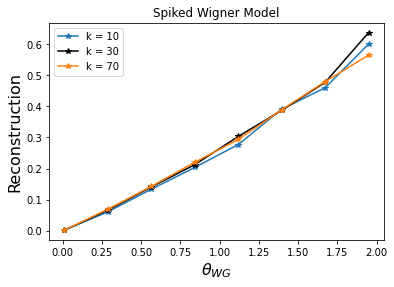

In [38]:
plt.plot((p), k10_logs_mean[:,1], '-*',label = 'k = 10')
plt.plot((p), k30_logs_mean[:,1], 'k-*',label = 'k = 30')
plt.plot((p), k70_logs_mean[:,1], '-*',label = 'k = 70')
plt.legend(loc='upper left');
plt.xlabel(r"$\theta_{WG}$", fontsize=16);
plt.ylabel(r"Reconstruction", fontsize=16);
plt.title('Spiked Wigner Model');
plt.savefig(PATH_res+'/MSE_WG_new.pdf',bbox_inches = 'tight')